<a href="https://colab.research.google.com/github/Veny1302/Analisis-Sentimen-MBG/blob/main/ANALISIS_SENTIMEN_LSTM_MBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALL DAN IMPORT

In [1]:
# Import required Python package
!pip install pandas
!pip install snscrape
!pip install transformers datasets scikit-learn torch
!pip install transformers
!pip install Sastrawi
!pip install deep_translator
!pip install imbalanced-learn
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 80.2 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
import torch
import joblib
import re
import pandas as pd
import string
import nltk
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from transformers.modeling_utils import PreTrainedModel
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from datasets import Dataset
from transformers import BertTokenizer, AutoModelForSequenceClassification, AutoConfig
from torch.nn import CrossEntropyLoss
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from deep_translator import GoogleTranslator

#LOAD DATASET

In [3]:
import pandas as pd

# Define the filename
filename = "mbg.csv"

# Specify the path to your CSV file
# Adjusting the path to where 'mbg.csv' is actually located.
file_path = f"/content/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=",")

# Display the DataFrame
display(df)

conversation_id_str                      created_at  favorite_count  \
0             1.875153e+18  Fri Jan 03 12:10:00 +0000 2025           295.0   
1             1.875816e+18  Sun Jan 05 08:07:34 +0000 2025           276.0   
2             1.875907e+18  Sun Jan 05 14:05:37 +0000 2025           215.0   
3             1.875962e+18  Sun Jan 05 17:44:23 +0000 2025          9871.0   
4             1.876077e+18  Mon Jan 06 01:21:34 +0000 2025           214.0   
...                    ...                             ...             ...   
20152         1.995169e+18  Sun Nov 30 16:30:32 +0000 2025             1.0   
20153         1.995169e+18  Sun Nov 30 16:30:39 +0000 2025             1.0   
20154         1.995169e+18  Sun Nov 30 16:30:45 +0000 2025             1.0   
20155         1.995254e+18  Sun Nov 30 22:11:14 +0000 2025             0.0   
20156         1.995276e+18  Sun Nov 30 23:38:47 +0000 2025             0.0   

                                               full_text        id_str  \
0      Ketum PBNU Gus Yahya mengatakan pihaknya ingin...  1.875153e+18   
1      Mulai Besok 6 Januari 2025 Program Makan Bergi...  1.875816e+18   
2      Besok Makan Bergizi Gratis akan dimulai. Mohon...  1.875907e+18   
3      Di kasih pilihan pendidikan gratis hingga sarj...  1.875962e+18   
4      Harga per porsi makan siang gratis makin lama ...  1.876077e+18   
...                                                  ...           ...   
20152  Makan bergizi gratis memberi harapan baru untu...  1.995169e+18   
20153  Ketika anak-anak mendapatkan makanan bergizi k...  1.995169e+18   
20154  Hadirnya makan bergizi gratis menunjukkan komi...  1.995169e+18   
20155  kenapa ya banyak orang yg ga bisa bedain antar...  1.995254e+18   
20156   mandiri dengan makan bergizi gratis ? kualik wo   1.995276e+18   

                                               image_url  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3      https://pbs.twimg.com/ext_tw_video_thumb/18759...   
4                                                    NaN   
...                                                  ...   
20152    https://pbs.twimg.com/media/G7BDP7RbMAAkbYa.jpg   
20153    https://pbs.twimg.com/media/G7BDRqJaUAAl6Rt.jpg   
20154    https://pbs.twimg.com/media/G7BDTL7aMAAyPw_.jpg   
20155                                                NaN   
20156                                                NaN   

      in_reply_to_screen_name lang  location  quote_count  reply_count  \
0                         NaN   in       NaN        139.0        608.0   
1                         NaN   in       NaN          8.0         50.0   
2                         NaN   in       NaN         42.0        298.0   
3                         NaN   in       NaN         75.0        124.0   
4                         NaN   in       NaN          4.0         58.0   
...                       ...  ...       ...          ...          ...   
20152                     NaN   in       NaN          0.0          0.0   
20153                     NaN   in       NaN          0.0          0.0   
20154                     NaN   in       NaN          0.0          0.0   
20155                     NaN   in       NaN          0.0          0.0   
20156                     NaN   in       NaN          0.0          0.0   

       retweet_count                                          tweet_url  \
0               82.0  https://x.com/undefined/status/187515263016024...   
1               71.0  https://x.com/undefined/status/187581639731989...   
2               27.0  https://x.com/undefined/status/187590650344791...   
3             3123.0  https://x.com/undefined/status/187596155593603...   
4               44.0  https://x.com/undefined/status/187607661201129...   
...              ...                                                ...   
20152            0.0  https://x.com/undefined/

In [4]:
num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 20157.


In [5]:
import pandas as pd
df = pd.read_csv("/content/mbg.csv")
df.head()

conversation_id_str                      created_at  favorite_count  \
0         1.875153e+18  Fri Jan 03 12:10:00 +0000 2025           295.0   
1         1.875816e+18  Sun Jan 05 08:07:34 +0000 2025           276.0   
2         1.875907e+18  Sun Jan 05 14:05:37 +0000 2025           215.0   
3         1.875962e+18  Sun Jan 05 17:44:23 +0000 2025          9871.0   
4         1.876077e+18  Mon Jan 06 01:21:34 +0000 2025           214.0   

                                           full_text        id_str  \
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...  1.875153e+18   
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...  1.875816e+18   
2  Besok Makan Bergizi Gratis akan dimulai. Mohon...  1.875907e+18   
3  Di kasih pilihan pendidikan gratis hingga sarj...  1.875962e+18   
4  Harga per porsi makan siang gratis makin lama ...  1.876077e+18   

                                           image_url in_reply_to_screen_name  \
0                                                NaN                     NaN   
1                                                NaN                     NaN   
2                                                NaN                     NaN   
3  https://pbs.twimg.com/ext_tw_video_thumb/18759...                     NaN   
4                                                NaN                     NaN   

  lang  location  quote_count  reply_count  retweet_count  \
0   in       NaN        139.0        608.0           82.0   
1   in       NaN          8.0         50.0           71.0   
2   in       NaN         42.0        298.0           27.0   
3   in       NaN         75.0        124.0         3123.0   
4   in       NaN          4.0         58.0           44.0   

                                           tweet_url   user_id_str  username  
0  https://x.com/undefined/status/187515263016024...  6.918316e+07       NaN  
1  https://x.com/undefined/status/187581639731989...  8.601202e+07       NaN  
2  https://x.com/undefined/status/187590650344791...  6.467748e+07       NaN  
3  https://x.com/undefined/status/187596155593603...  9.033068e+17       NaN  
4  https://x.com/undefined/status/187607661201129...  1.559288e+08       NaN

#EDA

In [6]:
# Cek jumlah data dan kolom yang ada
df.shape

(20157, 15)

In [7]:
# Cek jumlah data yang didapatkan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20157 entries, 0 to 20156
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      20157 non-null  float64
 1   created_at               20157 non-null  object 
 2   favorite_count           20157 non-null  float64
 3   full_text                20157 non-null  object 
 4   id_str                   20157 non-null  float64
 5   image_url                14621 non-null  object 
 6   in_reply_to_screen_name  3758 non-null   object 
 7   lang                     20157 non-null  object 
 8   location                 0 non-null      float64
 9   quote_count              20157 non-null  float64
 10  reply_count              20157 non-null  float64
 11  retweet_count            20157 non-null  float64
 12  tweet_url                20157 non-null  object 
 13  user_id_str              20157 non-null  float64
 14  username              

In [8]:
# Cek missing value
print(df.isnull().sum())

conversation_id_str            0
created_at                     0
favorite_count                 0
full_text                      0
id_str                         0
image_url                   5536
in_reply_to_screen_name    16399
lang                           0
location                   20157
quote_count                    0
reply_count                    0
retweet_count                  0
tweet_url                      0
user_id_str                    0
username                   20157
dtype: int64


In [9]:
# Cek duplicate values kolom uniqueId dan text
print(df.duplicated(subset='id_str').sum())
print(df.duplicated(subset='full_text').sum())

4
46


In [10]:
import re
# Cek karakter unik pada kolom teks
def detect_URL(text):
    return bool(re.search(r'https?://\S+|www\.\S+', str(text)))

def detect_html(text):
    return bool(re.search(r'<.*?>', str(text)))

def detect_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U0001F004-\U0001F0CF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(str(text)))

def detect_symbol(text):
    return bool(re.search(r'[^a-zA-Z0-9\s]', str(text)))

def detect_number(text):
    return bool(re.search(r'\d', str(text)))

df['has_url'] = df['full_text'].apply(detect_URL)
df['has_html'] = df['full_text'].apply(detect_html)
df['has_emoji'] = df['full_text'].apply(detect_emoji)
df['has_symbol'] = df['full_text'].apply(detect_symbol)
df['has_number'] = df['full_text'].apply(detect_number)

In [11]:
print(df[['has_url', 'has_html', 'has_emoji', 'has_symbol', 'has_number']].sum())

has_url       17109
has_html          0
has_emoji       346
has_symbol    19909
has_number    15993
dtype: int64


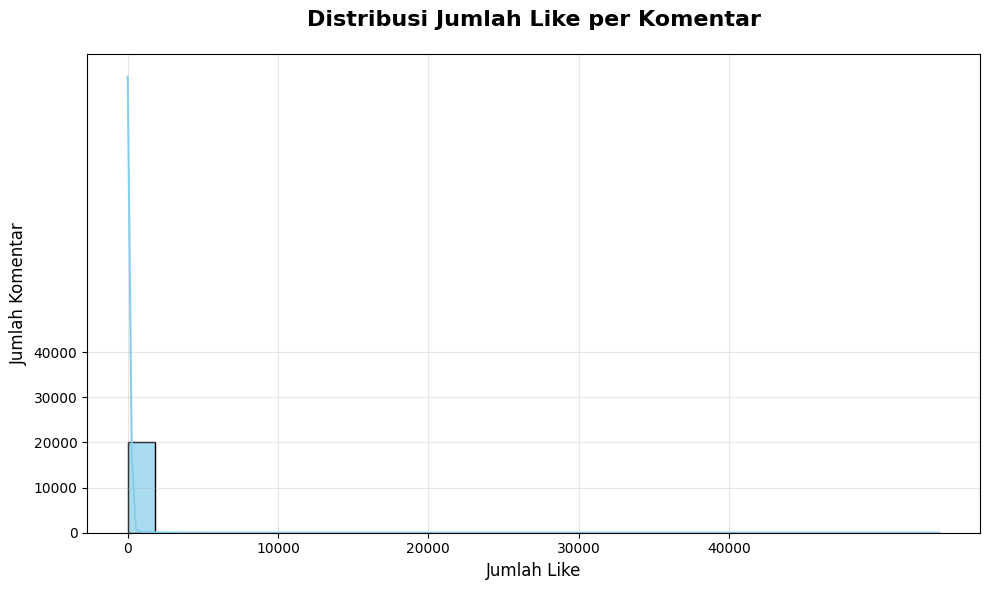

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

# Create figure dengan ukuran yang sesuai
plt.figure(figsize=(10, 6), facecolor='white') # Set facecolor to white

# Plot histogram dengan KDE
sns.histplot(data=df, x="favorite_count", bins=30, kde=True, color="skyblue", alpha=0.7)

# Customize plot
plt.title("Distribusi Jumlah Like per Komentar", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Jumlah Like", fontsize=12)
plt.ylabel("Jumlah Komentar", fontsize=12)

# Atur ticks pada sumbu x dan y sesuai dengan deskripsi
plt.xticks([0, 10000, 20000, 30000, 40000])
plt.yticks([0, 10000, 20000, 30000, 40000])

# Grid untuk memudahkan membaca nilai
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Tampilkan plot
plt.show()

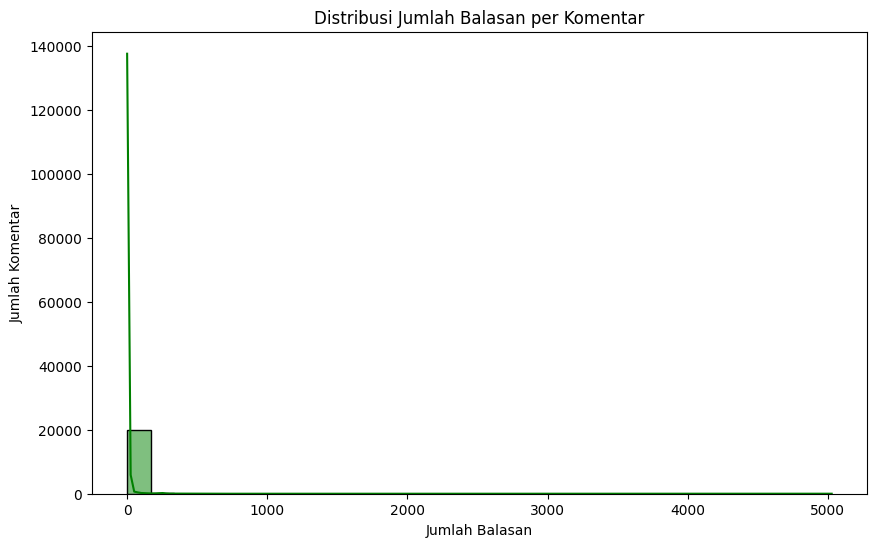

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df["reply_count"], bins=30, kde=True, color="green")
plt.title("Distribusi Jumlah Balasan per Komentar")
plt.xlabel("Jumlah Balasan")
plt.ylabel("Jumlah Komentar")
plt.show()

In [14]:
df = pd.DataFrame(df[['full_text']])
df.head()

full_text
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...
2  Besok Makan Bergizi Gratis akan dimulai. Mohon...
3  Di kasih pilihan pendidikan gratis hingga sarj...
4  Harga per porsi makan siang gratis makin lama ...

###WORDCLOUD SEBELUM PREPROCESSING




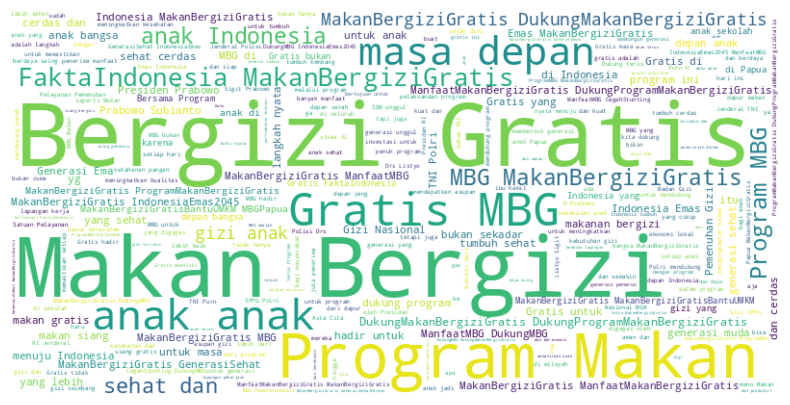

In [15]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df['full_text']= df['full_text'].fillna('')

text = ''.join(df['full_text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', 'amp', 't', 'x'])

wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

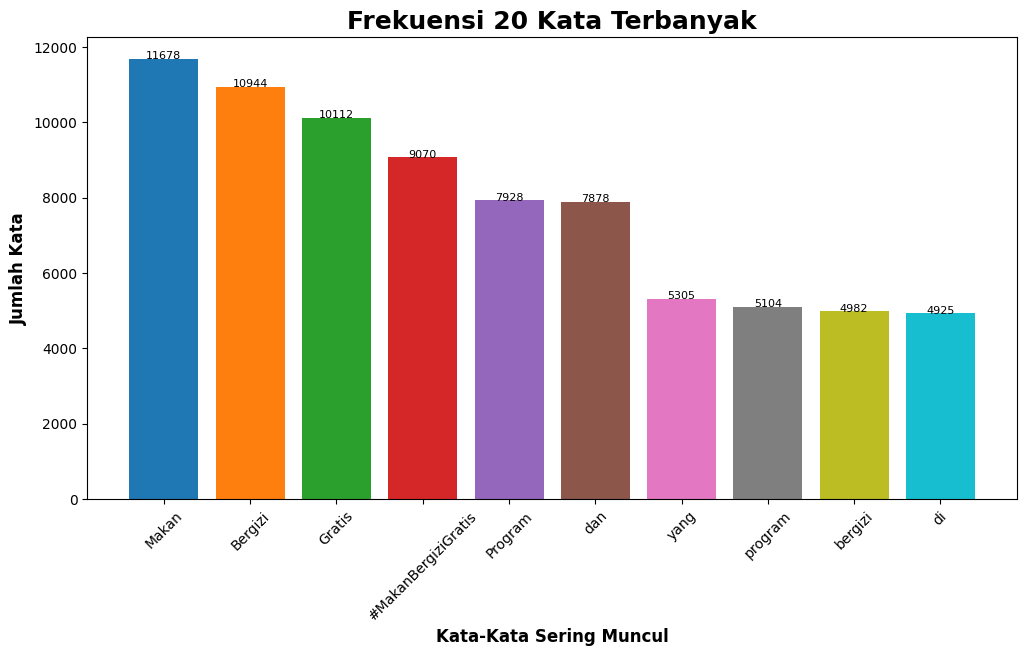

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["full_text"])

tokens = text.split()
word_counts = Counter(tokens)

# Ambil 20 kata paling sering muncul
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)

plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi 20 Kata Terbanyak", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tambahkan angka di atas bar
for bar, num in zip(bars, count):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        num + 1,
        str(num),
        fontsize=8,
        color='black',
        ha='center'
    )

plt.show()


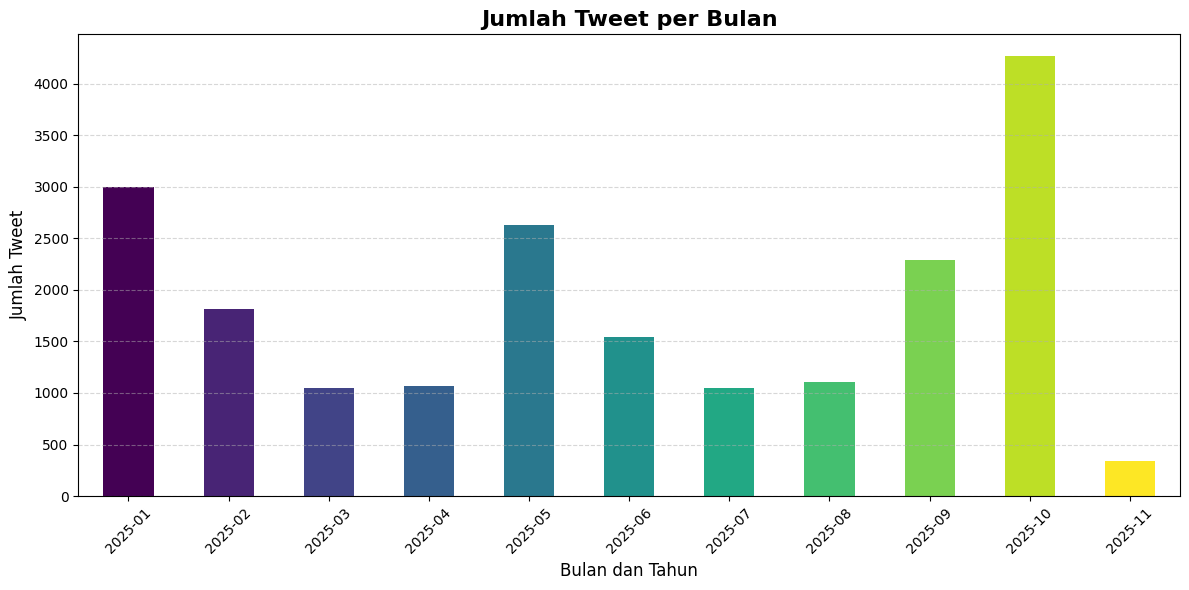

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Re-load df and process it to ensure 'date' column is present
df = pd.read_csv("/content/mbg.csv")
df = df[['created_at', 'full_text', 'username']].rename(columns={'created_at': 'date', 'full_text': 'tweet'}).drop_duplicates()

tweets = df.copy()

tweets['date'] = pd.to_datetime(
    tweets['date'],
    format='%a %b %d %H:%M:%S +0000 %Y',
    errors='coerce' # Handle parsing errors by coercing invalid dates to NaT
)

# Drop rows where 'date' could not be parsed (i.e., are NaT)
tweets.dropna(subset=['date'], inplace=True)

tweets['YearMonth'] = tweets['date'].dt.to_period('M')

monthly_tweets = tweets.groupby('YearMonth').size()

colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_tweets)))

# Plot grafik
plt.figure(figsize=(12, 6))
monthly_tweets.plot(kind='bar', color=colors)

plt.xlabel("Bulan dan Tahun", fontsize=12)
plt.ylabel("Jumlah Tweet", fontsize=12)
plt.title("Jumlah Tweet per Bulan", fontsize=16, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [18]:
import csv
def export_to_csv(df, file_name='tweets-mbg'):
    if not df.empty:
        # Update fieldnames to match the current columns in df
        fieldnames = ['date', 'tweet']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for index, row in df.iterrows():
                writer.writerow({
                    'date': row['date'],
                    'tweet': row['tweet'],
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

export_to_csv(df)

Data berhasil diekspor ke 'tweets-mbg'


In [19]:
data = pd.read_csv("/content/mbg.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20157 entries, 0 to 20156
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      20157 non-null  float64
 1   created_at               20157 non-null  object 
 2   favorite_count           20157 non-null  float64
 3   full_text                20157 non-null  object 
 4   id_str                   20157 non-null  float64
 5   image_url                14621 non-null  object 
 6   in_reply_to_screen_name  3758 non-null   object 
 7   lang                     20157 non-null  object 
 8   location                 0 non-null      float64
 9   quote_count              20157 non-null  float64
 10  reply_count              20157 non-null  float64
 11  retweet_count            20157 non-null  float64
 12  tweet_url                20157 non-null  object 
 13  user_id_str              20157 non-null  float64
 14  username              

In [20]:
data.head(5)

conversation_id_str                      created_at  favorite_count  \
0         1.875153e+18  Fri Jan 03 12:10:00 +0000 2025           295.0   
1         1.875816e+18  Sun Jan 05 08:07:34 +0000 2025           276.0   
2         1.875907e+18  Sun Jan 05 14:05:37 +0000 2025           215.0   
3         1.875962e+18  Sun Jan 05 17:44:23 +0000 2025          9871.0   
4         1.876077e+18  Mon Jan 06 01:21:34 +0000 2025           214.0   

                                           full_text        id_str  \
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...  1.875153e+18   
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...  1.875816e+18   
2  Besok Makan Bergizi Gratis akan dimulai. Mohon...  1.875907e+18   
3  Di kasih pilihan pendidikan gratis hingga sarj...  1.875962e+18   
4  Harga per porsi makan siang gratis makin lama ...  1.876077e+18   

                                           image_url in_reply_to_screen_name  \
0                                                NaN                     NaN   
1                                                NaN                     NaN   
2                                                NaN                     NaN   
3  https://pbs.twimg.com/ext_tw_video_thumb/18759...                     NaN   
4                                                NaN                     NaN   

  lang  location  quote_count  reply_count  retweet_count  \
0   in       NaN        139.0        608.0           82.0   
1   in       NaN          8.0         50.0           71.0   
2   in       NaN         42.0        298.0           27.0   
3   in       NaN         75.0        124.0         3123.0   
4   in       NaN          4.0         58.0           44.0   

                                           tweet_url   user_id_str  username  
0  https://x.com/undefined/status/187515263016024...  6.918316e+07       NaN  
1  https://x.com/undefined/status/187581639731989...  8.601202e+07       NaN  
2  https://x.com/undefined/status/187590650344791...  6.467748e+07       NaN  
3  https://x.com/undefined/status/187596155593603...  9.033068e+17       NaN  
4  https://x.com/undefined/status/187607661201129...  1.559288e+08       NaN

#PREPROCESSING DATA

In [21]:
data = pd.read_csv("/content/tweets-mbg")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20157 entries, 0 to 20156
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    20157 non-null  object
 1   tweet   20157 non-null  object
dtypes: object(2)
memory usage: 315.1+ KB


In [22]:
data.head(10)

date  \
0  Fri Jan 03 12:10:00 +0000 2025   
1  Sun Jan 05 08:07:34 +0000 2025   
2  Sun Jan 05 14:05:37 +0000 2025   
3  Sun Jan 05 17:44:23 +0000 2025   
4  Mon Jan 06 01:21:34 +0000 2025   
5  Mon Jan 06 02:17:35 +0000 2025   
6  Mon Jan 06 03:05:40 +0000 2025   
7  Mon Jan 06 03:20:23 +0000 2025   
8  Mon Jan 06 03:50:59 +0000 2025   
9  Mon Jan 06 04:32:20 +0000 2025   

                                               tweet  
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...  
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...  
2  Besok Makan Bergizi Gratis akan dimulai. Mohon...  
3  Di kasih pilihan pendidikan gratis hingga sarj...  
4  Harga per porsi makan siang gratis makin lama ...  
5  Makan siang gratis yang lapar siapa? Yang keny...  
6  Indonesia Miulai Program Makan Bergizi Gratis ...  
7  190 Dapur di 26 Provinsi Pasok Menu Makan Berg...  
8  PBNU Terbelah soal Makan Bergizi Gratis Gus Ya...  
9  Menu Makan Bergizi Gratis (MBG) terdiri dari n...

In [23]:
df  = pd.DataFrame(data[['date','tweet']])
df.head(5)

date  \
0  Fri Jan 03 12:10:00 +0000 2025   
1  Sun Jan 05 08:07:34 +0000 2025   
2  Sun Jan 05 14:05:37 +0000 2025   
3  Sun Jan 05 17:44:23 +0000 2025   
4  Mon Jan 06 01:21:34 +0000 2025   

                                               tweet  
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...  
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...  
2  Besok Makan Bergizi Gratis akan dimulai. Mohon...  
3  Di kasih pilihan pendidikan gratis hingga sarj...  
4  Harga per porsi makan siang gratis makin lama ...

##Hapus Duplikat Values

In [24]:
df.drop_duplicates(subset ="tweet", keep = 'first', inplace = True)

In [25]:
df.shape

(20111, 2)

In [26]:
df.to_csv('hasil_hapus_duplikay.csv', index=False);

##Cleaning

In [27]:
import re
import pandas as pd # Ensure pandas is imported as it's used with df

# Define the cleaning function
def clean_text(text):
    # Convert to string to handle potential non-string types
    text = str(text)

    # Remove URLs (http/https and www.)
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove Twitter mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # Remove common punctuation and special characters, but retain numbers and emojis
    # This regex specifically targets punctuation characters to remove
    # and avoids removing alphanumeric characters, spaces, and other unicode characters (like emojis)
    text = re.sub(r'[.,!?:;"\'`\]\[()]', '', text)

    return text

# Apply the cleaning function to the 'tweet' column
df['cleaning'] = df['tweet'].apply(clean_text)

# Display the first 10 rows of the 'tweet' and 'cleaning' columns
display(df[['tweet', 'cleaning']].head(10))

tweet  \
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...   
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...   
2  Besok Makan Bergizi Gratis akan dimulai. Mohon...   
3  Di kasih pilihan pendidikan gratis hingga sarj...   
4  Harga per porsi makan siang gratis makin lama ...   
5  Makan siang gratis yang lapar siapa? Yang keny...   
6  Indonesia Miulai Program Makan Bergizi Gratis ...   
7  190 Dapur di 26 Provinsi Pasok Menu Makan Berg...   
8  PBNU Terbelah soal Makan Bergizi Gratis Gus Ya...   
9  Menu Makan Bergizi Gratis (MBG) terdiri dari n...   

                                            cleaning  
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...  
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...  
2  Besok Makan Bergizi Gratis akan dimulai Mohon ...  
3  Di kasih pilihan pendidikan gratis hingga sarj...  
4  Harga per porsi makan siang gratis makin lama ...  
5  Makan siang gratis yang lapar siapa Yang kenya...  
6  Indonesia Miulai Program Makan Bergizi Gratis ...  
7  190 Dapur di 26 Provinsi Pasok Menu Makan Berg...  
8  PBNU Terbelah soal Makan Bergizi Gratis Gus Ya...  
9  Menu Makan Bergizi Gratis MBG terdiri dari nas...

##Casefolding

In [28]:
df['case_folding'] = df['cleaning'].str.lower()
display(df[['tweet', 'cleaning', 'case_folding']].head())

tweet  \
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...   
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...   
2  Besok Makan Bergizi Gratis akan dimulai. Mohon...   
3  Di kasih pilihan pendidikan gratis hingga sarj...   
4  Harga per porsi makan siang gratis makin lama ...   

                                            cleaning  \
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...   
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...   
2  Besok Makan Bergizi Gratis akan dimulai Mohon ...   
3  Di kasih pilihan pendidikan gratis hingga sarj...   
4  Harga per porsi makan siang gratis makin lama ...   

                                        case_folding  
0  ketum pbnu gus yahya mengatakan pihaknya ingin...  
1  mulai besok 6 januari 2025 program makan bergi...  
2  besok makan bergizi gratis akan dimulai mohon ...  
3  di kasih pilihan pendidikan gratis hingga sarj...  
4  harga per porsi makan siang gratis makin lama ...

##Normalisasi Kata

In [29]:
import pandas as pd

# Ensure the replace_taboo_words function is defined (copied from DHLxeaife_O5)
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

# 1. Load kamuskatabaku.xlsx and create kamus_tidak_baku (copied from TcwZXW2oBrR2)
kamus_data = pd.read_excel("/content/kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak baku'], kamus_data['baku']))

# 2. Apply normalization to the 'case_folding' column
df['normalisasi'], df['Baku'], df['tidak baku'], df['Kata_Tidak_Baku_Hash'] = zip(*df['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

# 3. Display the first few rows with the new 'normalisasi' column
display(df[['tweet', 'cleaning', 'case_folding', 'normalisasi']].head())

tweet  \
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...   
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...   
2  Besok Makan Bergizi Gratis akan dimulai. Mohon...   
3  Di kasih pilihan pendidikan gratis hingga sarj...   
4  Harga per porsi makan siang gratis makin lama ...   

                                            cleaning  \
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...   
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...   
2  Besok Makan Bergizi Gratis akan dimulai Mohon ...   
3  Di kasih pilihan pendidikan gratis hingga sarj...   
4  Harga per porsi makan siang gratis makin lama ...   

                                        case_folding  \
0  ketum pbnu gus yahya mengatakan pihaknya ingin...   
1  mulai besok 6 januari 2025 program makan bergi...   
2  besok makan bergizi gratis akan dimulai mohon ...   
3  di kasih pilihan pendidikan gratis hingga sarj...   
4  harga per porsi makan siang gratis makin lama ...   

                                         normalisasi  
0  ketum pbnu gus yahya mengatakan pihaknya ingin...  
1  mulai besok 6 januari 2025 program makan bergi...  
2  besok makan bergizi gratis akan dimulai mohon ...  
3  di kasih pilihan pendidikan gratis hingga sarj...  
4  harga per porsi makan siang gratis semakin lam...

##Stopword Removal

In [30]:
import nltk

# Ensure stopwords are downloaded (if not already) and loaded
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('indonesian')

# 1. Define the tokenize function (as 'normalisasi' is currently a string)
def tokenize(text):
    return text.split()

# Apply tokenization to 'normalisasi' column
df['tokenized_normalisasi'] = df['normalisasi'].apply(tokenize)

# 2. Define the remove_stopwords function
def remove_stopwords(word_list):
    return [word for word in word_list if word not in stop_words]

# 3. Apply the remove_stopwords function to the tokenized list
df['stopword removal'] = df['tokenized_normalisasi'].apply(remove_stopwords)

# 4. Display the first few rows of the DataFrame, showing the 'normalisasi' and 'stopword removal' columns
display(df[['normalisasi', 'stopword removal']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


normalisasi  \
0  ketum pbnu gus yahya mengatakan pihaknya ingin...   
1  mulai besok 6 januari 2025 program makan bergi...   
2  besok makan bergizi gratis akan dimulai mohon ...   
3  di kasih pilihan pendidikan gratis hingga sarj...   
4  harga per porsi makan siang gratis semakin lam...   

                                    stopword removal  
0  [ketum, pbnu, gus, yahya, dilibatkan, program,...  
1  [besok, 6, januari, 2025, program, makan, berg...  
2  [besok, makan, bergizi, gratis, mohon, doanya,...  
3  [kasih, pilihan, pendidikan, gratis, sarjana, ...  
4  [harga, porsi, makan, siang, gratis, turun, bi...

##Stemming Data

In [31]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

date  \
0  Fri Jan 03 12:10:00 +0000 2025   
1  Sun Jan 05 08:07:34 +0000 2025   
2  Sun Jan 05 14:05:37 +0000 2025   
3  Sun Jan 05 17:44:23 +0000 2025   
4  Mon Jan 06 01:21:34 +0000 2025   

                                               tweet  \
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...   
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...   
2  Besok Makan Bergizi Gratis akan dimulai. Mohon...   
3  Di kasih pilihan pendidikan gratis hingga sarj...   
4  Harga per porsi makan siang gratis makin lama ...   

                                            cleaning  \
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...   
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...   
2  Besok Makan Bergizi Gratis akan dimulai Mohon ...   
3  Di kasih pilihan pendidikan gratis hingga sarj...   
4  Harga per porsi makan siang gratis makin lama ...   

                                        case_folding  \
0  ketum pbnu gus yahya mengatakan pihaknya ingin...   
1  mulai besok 6 januari 2025 program makan bergi...   
2  besok makan bergizi gratis akan dimulai mohon ...   
3  di kasih pilihan pendidikan gratis hingga sarj...   
4  harga per porsi makan siang gratis makin lama ...   

                                         normalisasi  \
0  ketum pbnu gus yahya mengatakan pihaknya ingin...   
1  mulai besok 6 januari 2025 program makan bergi...   
2  besok makan bergizi gratis akan dimulai mohon ...   
3  di kasih pilihan pendidikan gratis hingga sarj...   
4  harga per porsi makan siang gratis semakin lam...   

                            Baku                  tidak baku  \
0                             []                          []   
1                             []                          []   
2                             []                          []   
3  [justru, memilih, makan, itu]  [malah, milih, mamam, tuh]   
4             [semakin, semakin]              [makin, makin]   

                                Kata_Tidak_Baku_Hash  \
0                                                 []   
1                                                 []   
2                                                 []   
3  [8535724202511345728, 2901449511804436310, -31...   
4           [963987193132946709, 963987193132946709]   

                               tokenized_normalisasi  \
0  [ketum, pbnu, gus, yahya, mengatakan, pihaknya...   
1  [mulai, besok, 6, januari, 2025, program, maka...   
2  [besok, makan, bergizi, gratis, akan, dimulai,...   
3  [di, kasih, pilihan, pendidikan, gratis, hingg...   
4  [harga, per, porsi, makan, siang, gratis, sema...   

                                    stopword removal  \
0  [ketum, pbnu, gus, yahya, dilibatkan, program,...   
1  [besok, 6, januari, 2025, program, makan, berg...   
2  [besok, makan, bergizi, gratis, mohon, doanya,...   
3  [kasih, pilihan, pendidikan, gratis, sarjana, ...   
4  [harga, porsi, makan, siang, gratis, turun, bi...   

                                        steming_data  
0  tum pbnu gus yahya libat program makan gizi gr...  
1  besok 6 januari 2025 program makan gizi gratis...  
2          besok makan gizi gratis mohon doa bangsa   
3  kasih pilih didik gratis sarjana pilih makan s...  
4  harga porsi makan siang gratis turun bisa menu...

In [32]:
df.to_excel('hasil_preprocessing.xlsx', index=False);


##Proses Hapus Data Bernilai Kosong (NAN)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20111 entries, 0 to 20156
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   20111 non-null  object
 1   tweet                  20111 non-null  object
 2   cleaning               20111 non-null  object
 3   case_folding           20111 non-null  object
 4   normalisasi            20111 non-null  object
 5   Baku                   20111 non-null  object
 6   tidak baku             20111 non-null  object
 7   Kata_Tidak_Baku_Hash   20111 non-null  object
 8   tokenized_normalisasi  20111 non-null  object
 9   stopword removal       20111 non-null  object
 10  steming_data           20111 non-null  object
dtypes: object(11)
memory usage: 2.3+ MB


In [34]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20111 entries, 0 to 20156
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   20111 non-null  object
 1   tweet                  20111 non-null  object
 2   cleaning               20111 non-null  object
 3   case_folding           20111 non-null  object
 4   normalisasi            20111 non-null  object
 5   Baku                   20111 non-null  object
 6   tidak baku             20111 non-null  object
 7   Kata_Tidak_Baku_Hash   20111 non-null  object
 8   tokenized_normalisasi  20111 non-null  object
 9   stopword removal       20111 non-null  object
 10  steming_data           20111 non-null  object
dtypes: object(11)
memory usage: 2.3+ MB


#WORDCLOUD SETELAH PREPROCESSING

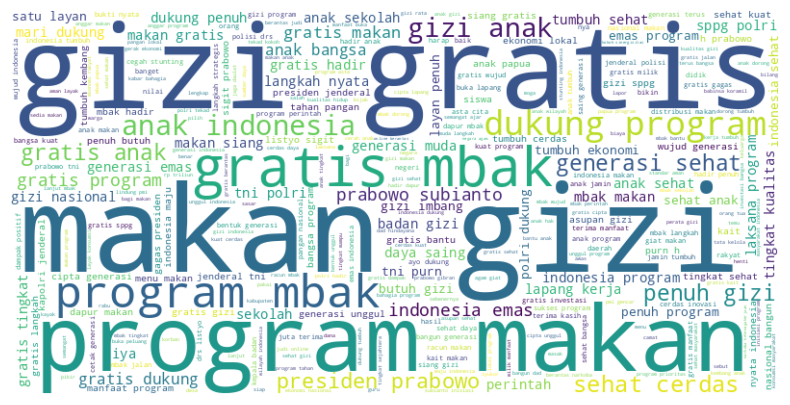

In [35]:
# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','ya'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

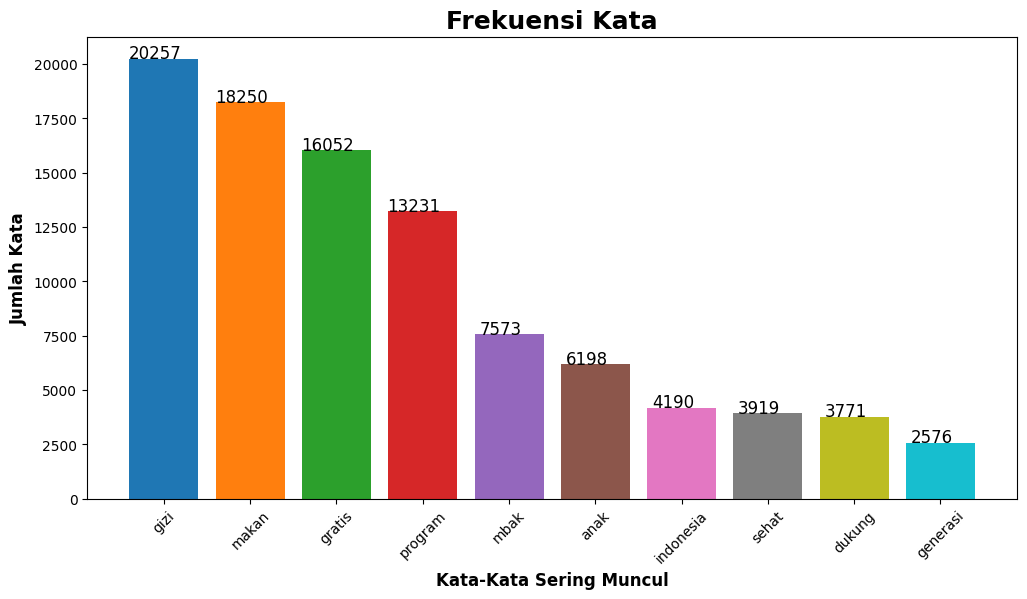

In [36]:
tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

In [37]:
df.to_csv('hasil_prepocessing.csv',encoding='utf8', index=False);

#LABELLING DATA DENGAN LEXICON BASED

In [38]:
data = pd.read_csv("/content/hasil_prepocessing.csv")
data.head(5)

date  \
0  Fri Jan 03 12:10:00 +0000 2025   
1  Sun Jan 05 08:07:34 +0000 2025   
2  Sun Jan 05 14:05:37 +0000 2025   
3  Sun Jan 05 17:44:23 +0000 2025   
4  Mon Jan 06 01:21:34 +0000 2025   

                                               tweet  \
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...   
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...   
2  Besok Makan Bergizi Gratis akan dimulai. Mohon...   
3  Di kasih pilihan pendidikan gratis hingga sarj...   
4  Harga per porsi makan siang gratis makin lama ...   

                                            cleaning  \
0  Ketum PBNU Gus Yahya mengatakan pihaknya ingin...   
1  Mulai Besok 6 Januari 2025 Program Makan Bergi...   
2  Besok Makan Bergizi Gratis akan dimulai Mohon ...   
3  Di kasih pilihan pendidikan gratis hingga sarj...   
4  Harga per porsi makan siang gratis makin lama ...   

                                        case_folding  \
0  ketum pbnu gus yahya mengatakan pihaknya ingin...   
1  mulai besok 6 januari 2025 program makan bergi...   
2  besok makan bergizi gratis akan dimulai mohon ...   
3  di kasih pilihan pendidikan gratis hingga sarj...   
4  harga per porsi makan siang gratis makin lama ...   

                                         normalisasi  \
0  ketum pbnu gus yahya mengatakan pihaknya ingin...   
1  mulai besok 6 januari 2025 program makan bergi...   
2  besok makan bergizi gratis akan dimulai mohon ...   
3  di kasih pilihan pendidikan gratis hingga sarj...   
4  harga per porsi makan siang gratis semakin lam...   

                                    Baku                          tidak baku  \
0                                     []                                  []   
1                                     []                                  []   
2                                     []                                  []   
3  ['justru', 'memilih', 'makan', 'itu']  ['malah', 'milih', 'mamam', 'tuh']   
4                 ['semakin', 'semakin']                  ['makin', 'makin']   

                                Kata_Tidak_Baku_Hash  \
0                                                 []   
1                                                 []   
2                                                 []   
3  [8535724202511345728, 2901449511804436310, -31...   
4           [963987193132946709, 963987193132946709]   

                               tokenized_normalisasi  \
0  ['ketum', 'pbnu', 'gus', 'yahya', 'mengatakan'...   
1  ['mulai', 'besok', '6', 'januari', '2025', 'pr...   
2  ['besok', 'makan', 'bergizi', 'gratis', 'akan'...   
3  ['di', 'kasih', 'pilihan', 'pendidikan', 'grat...   
4  ['harga', 'per', 'porsi', 'makan', 'siang', 'g...   

                                    stopword removal  \
0  ['ketum', 'pbnu', 'gus', 'yahya', 'dilibatkan'...   
1  ['besok', '6', 'januari', '2025', 'program', '...   
2  ['besok', 'makan', 'bergizi', 'gratis', 'mohon...   
3  ['kasih', 'pilihan', 'pendidikan', 'gratis', '...   
4  ['harga', 'porsi', 'makan', 'siang', 'gratis',...   

                                        steming_data  
0  tum pbnu gus yahya libat program makan gizi gr...  
1  besok 6 januari 2025 program makan gizi gratis...  
2          besok makan gizi gratis mohon doa bangsa   
3  kasih pilih didik gratis sarjana pilih makan s...  
4  harga porsi makan siang gratis turun bisa menu...

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20111 entries, 0 to 20110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   20111 non-null  object
 1   tweet                  20111 non-null  object
 2   cleaning               20111 non-null  object
 3   case_folding           20111 non-null  object
 4   normalisasi            20111 non-null  object
 5   Baku                   20111 non-null  object
 6   tidak baku             20111 non-null  object
 7   Kata_Tidak_Baku_Hash   20111 non-null  object
 8   tokenized_normalisasi  20111 non-null  object
 9   stopword removal       20111 non-null  object
 10  steming_data           20110 non-null  object
dtypes: object(11)
memory usage: 1.7+ MB


In [40]:
df = data.dropna()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20110 entries, 0 to 20110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   20110 non-null  object
 1   tweet                  20110 non-null  object
 2   cleaning               20110 non-null  object
 3   case_folding           20110 non-null  object
 4   normalisasi            20110 non-null  object
 5   Baku                   20110 non-null  object
 6   tidak baku             20110 non-null  object
 7   Kata_Tidak_Baku_Hash   20110 non-null  object
 8   tokenized_normalisasi  20110 non-null  object
 9   stopword removal       20110 non-null  object
 10  steming_data           20110 non-null  object
dtypes: object(11)
memory usage: 1.8+ MB


In [42]:
data = pd.DataFrame(data[['steming_data']])
data.head()

steming_data
0  tum pbnu gus yahya libat program makan gizi gr...
1  besok 6 januari 2025 program makan gizi gratis...
2          besok makan gizi gratis mohon doa bangsa 
3  kasih pilih didik gratis sarjana pilih makan s...
4  harga porsi makan siang gratis turun bisa menu...

In [43]:
import pandas as pd
import requests

# ===============================
# 1. Unduh kamus positif & negatif InSet dari GitHub
# ===============================
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# ===============================
# 2. Fungsi untuk menentukan sentimen dan menghitung skor
# ===============================
def determine_sentiment(text):
    if isinstance(text, str):

        # Hitung jumlah kata positif & negatif
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)

        # Skor sentimen
        sentiment_score = positive_count - negative_count

        # Tentukan label sentimen
        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"

        return sentiment_score, sentiment

    return 0, "Netral"

# Apply the function to the 'stemming_data' column
data[['sentiment_score', 'sentiment_label']] = data['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))
display(data.head())

steming_data  sentiment_score  \
0  tum pbnu gus yahya libat program makan gizi gr...                1   
1  besok 6 januari 2025 program makan gizi gratis...                3   
2          besok makan gizi gratis mohon doa bangsa                 1   
3  kasih pilih didik gratis sarjana pilih makan s...                2   
4  harga porsi makan siang gratis turun bisa menu...                3   

  sentiment_label  
0         Positif  
1         Positif  
2         Positif  
3         Positif  
4         Positif

In [44]:
# Check the distribution of sentiment labels for the entire DataFrame
sentiment_distribution = data['sentiment_label'].value_counts()
display(sentiment_distribution)

sentiment_label
Positif    13176
Netral      3735
Negatif     3200
Name: count, dtype: int64

/tmp/ipython-input-3972476278.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


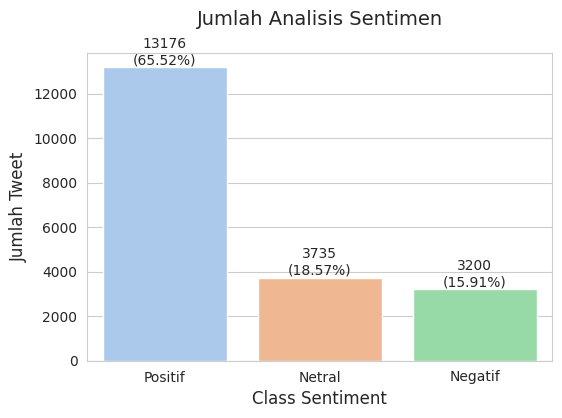

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment_label'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')

plt.title("Jumlah Analisis Sentimen", fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['sentiment_label'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{(100 * count / total):.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

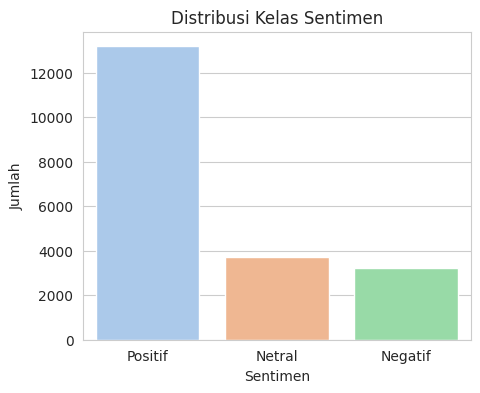

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(
    data=data, # Changed from df_label to data
    x="sentiment_label", # Changed from "Sentiment" to "sentiment_label"
    hue="sentiment_label", # Changed from "Sentiment" to "sentiment_label"
    palette="pastel"
)
plt.title("Distribusi Kelas Sentimen")
plt.ylabel("Jumlah")
plt.xlabel("Sentimen")
plt.show()

In [47]:
data.to_excel('hasil_labeling.xlsx', index=False)

In [48]:
data = pd.read_excel("/content/hasil_labeling.xlsx")

data = data.rename(columns={'sentiment_label': 'sentiment_label'})

# Bersihkan ;;; dari ISI DATA kolom Sentiment
data['sentiment_label'] = data['sentiment_label'].str.replace(';+', '', regex=True)
data.head(10)

steming_data  sentiment_score  \
0  tum pbnu gus yahya libat program makan gizi gr...                1   
1  besok 6 januari 2025 program makan gizi gratis...                3   
2          besok makan gizi gratis mohon doa bangsa                 1   
3  kasih pilih didik gratis sarjana pilih makan s...                2   
4  harga porsi makan siang gratis turun bisa menu...                3   
5  makan siang gratis lapar kenyang utas ringkas ...                1   
6                indonesia program makan gizi gratis                1   
7  190 dapur 26 provinsi pasok menu makan gizi gr...                1   
8  pbnu belah kait makan gizi gratis gus yahya li...                0   
9  menu makan gizi gratis mbak nasi putih sayur b...               -3   

  sentiment_label  
0         Positif  
1         Positif  
2         Positif  
3         Positif  
4         Positif  
5         Positif  
6         Positif  
7         Positif  
8          Netral  
9         Negatif

/tmp/ipython-input-3438688155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


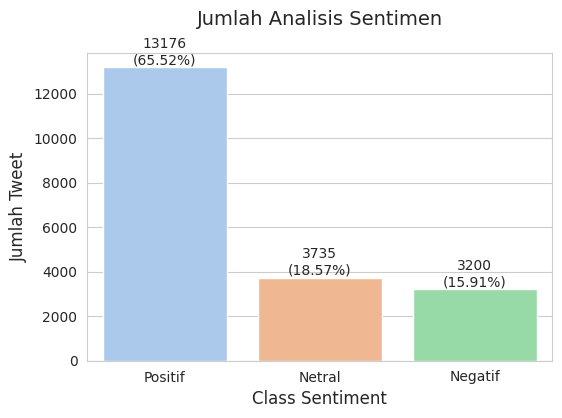

In [49]:
sentiment_count = data['sentiment_label'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['sentiment_label'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [50]:
sentimen_negatif = data[data['sentiment_label'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_positif = data[data['sentiment_label'] == 'Positif']['steming_data'].str.cat(sep=' ')
sentimen_netral = data[data['sentiment_label'] == 'Netral']['steming_data'].str.cat(sep=' ')

In [51]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
from PIL import Image # Import Image from PIL

# Explicitly load the data_labeling.xlsx to ensure 'data' DataFrame has 'sentiment_label'
data = pd.read_excel('/content/hasil_labeling.xlsx')

# Load the Twitter logo as a mask
url = "https://image.freepik.com/free-icon/twitter-logo_318-40459.jpg"
response = requests.get(url)
twitter_mask = np.array(Image.open(BytesIO(response.content)))

# Define the generate_wordCloud function (copied from previous cells to make this cell self-contained)
def generate_wordCloud(text_data, title, mask=None):
    stopwords = set(STOPWORDS)
    stopwords.update(['https', 'co', 'RT', 'amp', 't', 'x', 'fyp', 'lu', 'yg'])

    wordcloud = WordCloud(
        stopwords=stopwords,
        background_color="white",
        max_words=500,
        width=800,
        height=400,
        mask=mask
    ).generate(text_data)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

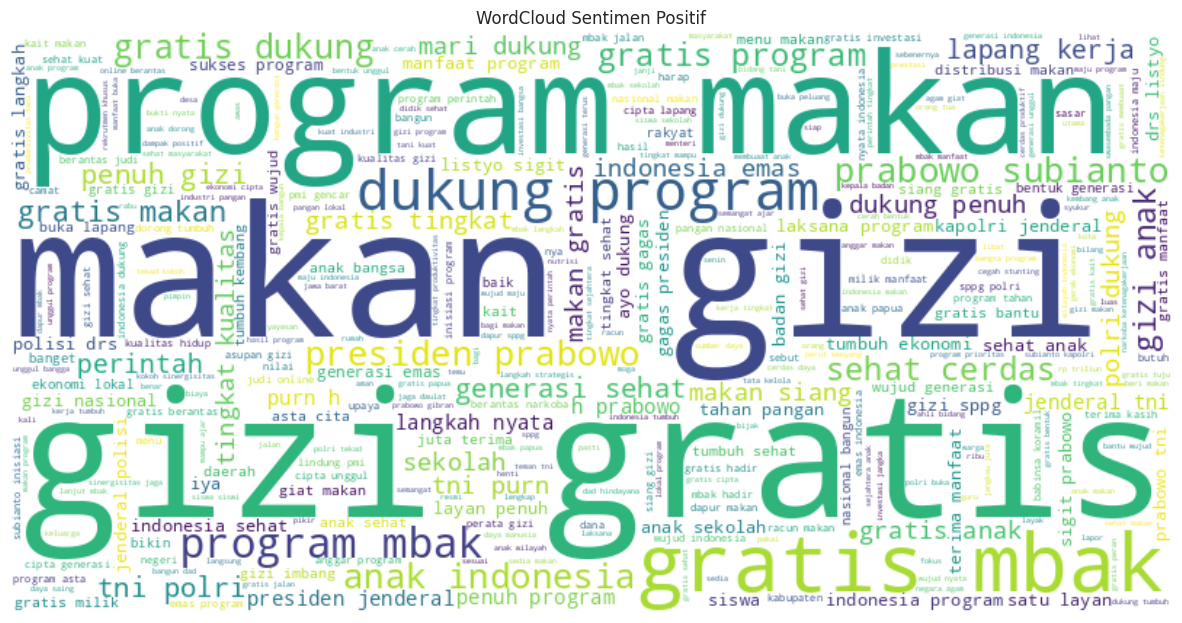

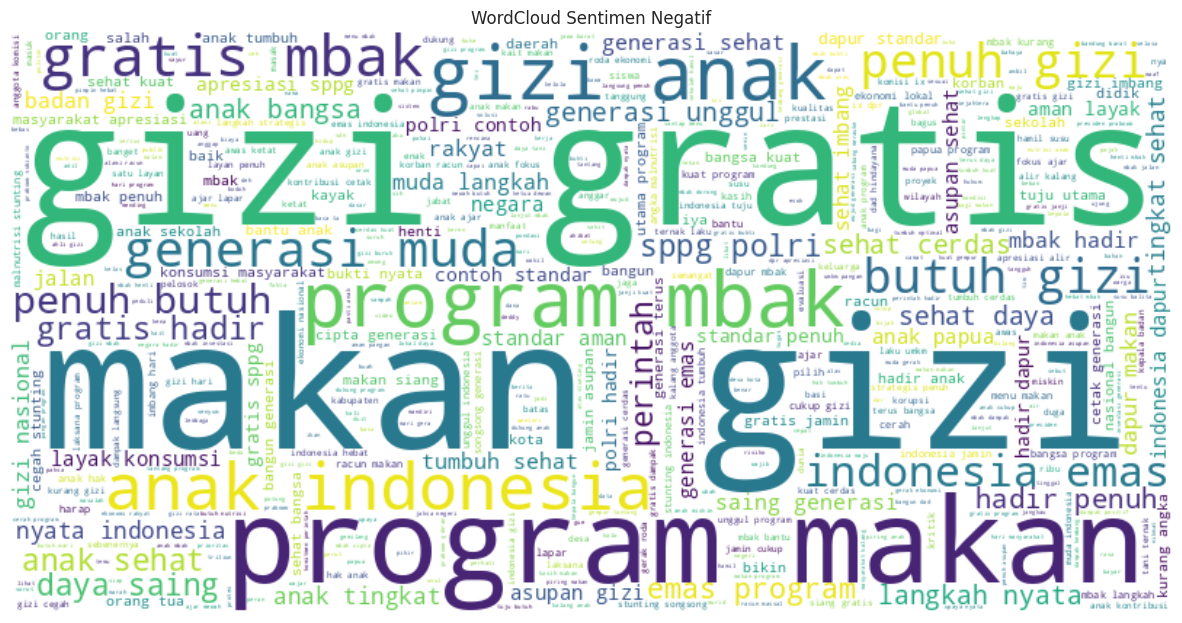

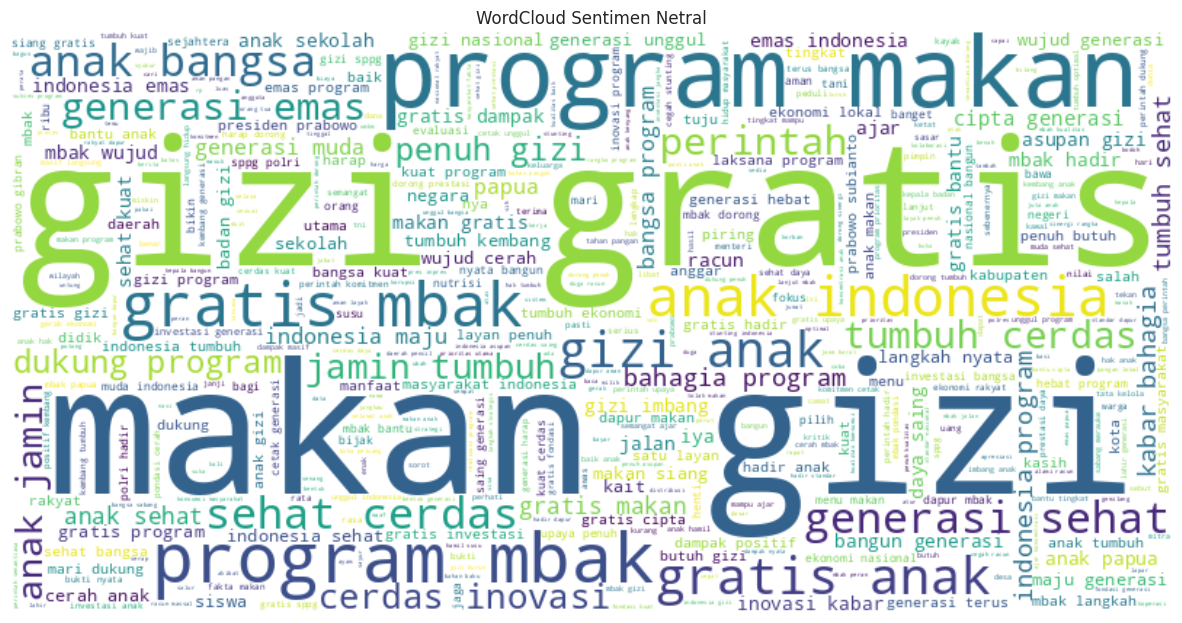

In [52]:

# Membuat WordCloud untuk sentimen positif
generate_wordCloud(sentimen_positif, 'WordCloud Sentimen Positif')
# Membuat WordCloud untuk sentimen negatif
generate_wordCloud(sentimen_negatif, 'WordCloud Sentimen Negatif')
# Membuat Wordcloud Netral
generate_wordCloud(sentimen_netral, 'WordCloud Sentimen Netral')

#Label Encoder

In [53]:
labels = data['sentiment_label'].unique().tolist()
#labels.append(4)
labels

['Positif', 'Netral', 'Negatif']

##Spliting Data

In [54]:
from sklearn.model_selection import train_test_split

# Ensure 'steming_data' column does not contain NaN values before splitting
data.dropna(subset=['steming_data'], inplace=True)

df_train, df_test = train_test_split(
    data,
    test_size=0.2,
    random_state=42,
    stratify=data['sentiment_label']  # WAJIB biar seimbang
)

print("Train size:", df_train.shape)
print("Test size :", df_test.shape)


Train size: (16088, 3)
Test size : (4022, 3)


In [55]:
# Define X_train, y_train, X_test, y_test from the already split df_train and df_test
X_train = df_train['steming_data']
y_train = df_train['sentiment_label']
X_test = df_test['steming_data']
y_test = df_test['sentiment_label']

# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment_label': y_train})
train_set.to_csv('/content/train_data.csv', index=False)

# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('/content/test_data.csv', index=False)

print("Data latih dan uji berhasil disimpan.")

Data latih dan uji berhasil disimpan.


In [56]:
# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {X_train.shape[0]}')
print(f'Jumlah Data Uji: {X_test.shape[0]}')

Jumlah Data Latih: 16088
Jumlah Data Uji: 4022


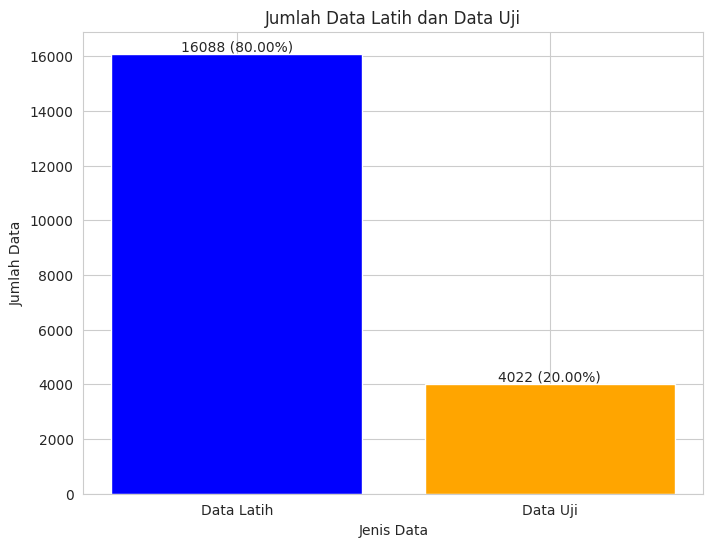

In [57]:
# Jumlah data latih dan data uji
train_size =X_train.shape[0]
test_size = X_test.shape[0]

# Membuat plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

In [58]:
from sklearn.utils import class_weight
import numpy as np

# Re-define label_map and y_train_enc
label_map = {'Negatif':0, 'Netral':1, 'Positif':2}
y_train_enc = y_train.map(label_map)

# Calculate class weights for y_train
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_enc),
    y=y_train_enc
)

# Convert class weights array to a dictionary for Keras
class_weights = dict(enumerate(class_weights_array))

print("Calculated Class Weights:", class_weights)

Calculated Class Weights: {0: np.float64(2.0947916666666666), 1: np.float64(1.795335342037719), 2: np.float64(0.5087436359611675)}


##IMPORT LIBRARY

In [59]:
!pip install -q transformers torch tensorflow scikit-learn openpyxl


In [60]:
import pandas as pd
import numpy as np
import torch

from transformers import BertTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


#Load dan Split Data

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the data (copied from cell PvHH-WwdWqMg, which also includes handling NaNs)
data = pd.read_excel("/content/hasil_labeling.xlsx")

# Ensure the column names are correct and handle NaNs if any (from PvHH-WwdWqMg and subsequent cleaning steps)
data = data.rename(columns={'sentiment_label': 'sentiment_label'})
data['sentiment_label'] = data['sentiment_label'].str.replace(';+', '', regex=True) # Ensure this cleaning is applied
data.dropna(subset=['steming_data'], inplace=True)
data['steming_data'] = data['steming_data'].astype(str)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['sentiment_label'])
y = to_categorical(y, num_classes=3)

X = data['steming_data']

##Encoding Label 3 Kelas

In [62]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['sentiment_label'])
y = to_categorical(y, num_classes=3)

X = data['steming_data']


##Split Data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


#TOKENISASI BERT

In [64]:
from transformers import BertTokenizer
import pandas as pd

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
MAX_LEN = 64   # WAJIB kecil agar tidak crash

def bert_tokenize(texts):
    return tokenizer(
        list(texts),
        padding="max_length",
        truncation=True,
        max_length=MAX_LEN,
        return_tensors="pt"
    )

train_tokens = bert_tokenize(X_train)
test_tokens  = bert_tokenize(X_test)



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

##LOAD MODEL BERT

In [65]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

bert_model = AutoModel.from_pretrained("bert-base-multilingual-cased")
bert_model.to(device)
bert_model.eval()


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

##EMBEDDING BERT

In [66]:
def bert_embedding(tokens, batch_size=4):  # KECILKAN
    all_embeddings = []

    for i in range(0, len(tokens['input_ids']), batch_size):
        input_ids = tokens['input_ids'][i:i+batch_size]
        attention_mask = tokens['attention_mask'][i:i+batch_size]

        with torch.no_grad():
            outputs = bert_model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

        cls_embedding = outputs.last_hidden_state[:, 0, :]
        all_embeddings.append(cls_embedding.cpu().numpy())

    return np.vstack(all_embeddings)


In [67]:
X_train_embed = bert_embedding(train_tokens)
X_test_embed  = bert_embedding(test_tokens)

print("Train embedding shape:", X_train_embed.shape)
print("Test embedding shape :", X_test_embed.shape)


Train embedding shape: (16088, 768)
Test embedding shape : (4022, 768)


#Model LSTM

In [9]:
from sklearn.utils import class_weight
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential()
model.add(Embedding(
    input_dim=vocab_size,
    output_dim=W2V_SIZE,
    weights=[embedding_matrix],
    input_length=SEQUENCE_LENGTH,
    trainable=False
))
model.add(Bidirectional(LSTM(
    128,
    return_sequences=False,
    dropout=0.3,
    recurrent_dropout=0.3
)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     1,041,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,041,200 (3.97 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,041,200 (3.97 MB)

#Train LSTM

In [10]:
history_weighted = model.fit(
    X_train_pad,
    y_train_cat,
    validation_data=(X_test_pad, y_test_cat),
    epochs=20,                 # Set a sufficiently large number for epochs
    batch_size=64,
    callbacks=[early_stopping_improved, checkpoint],
    class_weight=class_weights, # Incorporate class weights
    verbose=1
)

Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.4639 - loss: 1.0556
Epoch 1: val_loss improved from inf to 0.88733, saving model to best_model.keras
252/252 ━━━━━━━━━━━━━━━━━━━━ 107s 393ms/step - accuracy: 0.4640 - loss: 1.0555 - val_accuracy: 0.5773 - val_loss: 0.8873
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.5335 - loss: 0.9574
Epoch 2: val_loss improved from 0.88733 to 0.77729, saving model to best_model.keras
252/252 ━━━━━━━━━━━━━━━━━━━━ 128s 339ms/step - accuracy: 0.5336 - loss: 0.9573 - val_accuracy: 0.6885 - val_loss: 0.7773
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5749 - loss: 0.9102
Epoch 3: val_loss improved from 0.77729 to 0.73851, saving model to best_model.keras
252/252 ━━━━━━━━━━━━━━━━━━━━ 141s 336ms/step - accuracy: 0.5750 - loss: 0.9101 - val_accuracy: 0.6870 - val_loss: 0.7385
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.6224 - loss: 0.8667
Epoch 4: val_loss improved from 0.

#Prediksi

In [11]:
y_pred = model.predict(X_test_embed)
y_pred_label = np.argmax(y_pred, axis=1)


NameError: name 'X_test_embed' is not defined

#Evaluasi LSTM

In [12]:
y_pred = model.predict(X_test_pad)
y_pred_label = np.argmax(y_pred, axis=1)
y_test_label = np.argmax(y_test_cat, axis=1)

y_pred_lstm_label = y_pred_label # Assign y_pred_label to y_pred_lstm_label

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test_label, y_pred_label))
print(classification_report(
    y_test_label,
    y_pred_label,
    target_names=['Negatif', 'Netral', 'Positif']
))

126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step
Accuracy: 0.779462953754351
              precision    recall  f1-score   support

     Negatif       0.60      0.74      0.66       640
      Netral       0.58      0.57      0.58       747
     Positif       0.89      0.85      0.87      2635

    accuracy                           0.78      4022
   macro avg       0.69      0.72      0.70      4022
weighted avg       0.79      0.78      0.78      4022



#Visualisasi Akurasi & Loss

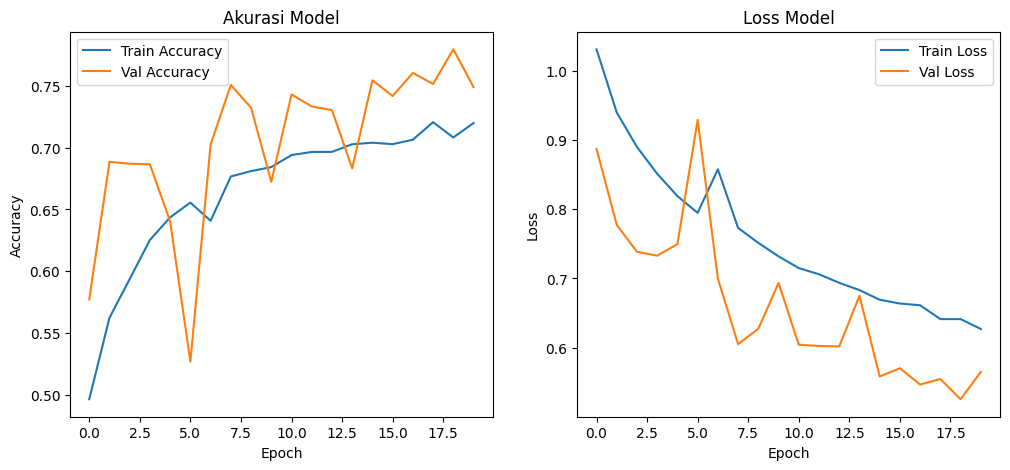

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_weighted.history['accuracy'], label='Train Accuracy')
plt.plot(history_weighted.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_weighted.history['loss'], label='Train Loss')
plt.plot(history_weighted.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#CONFUSION MATRIX (LSTM)

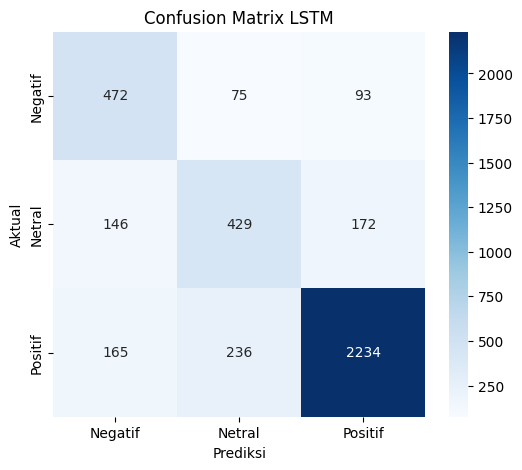

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_label, y_pred_lstm_label)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Negatif','Netral','Positif'],
    yticklabels=['Negatif','Netral','Positif']
)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix LSTM")
plt.show()

In [ ]:
from sklearn.utils import class_weight
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# --- Re-initialize all necessary variables ---

# 1. Load data and handle NaNs (from previous successful cells)
data = pd.read_excel("/content/hasil_labeling.xlsx")
data = data.rename(columns={'sentiment_label': 'sentiment_label'})
data['sentiment_label'] = data['sentiment_label'].str.replace(';+', '', regex=True)
data.dropna(subset=['steming_data'], inplace=True)

# 2. Split data (from cell c6Otn6YhafFB)
X = data['steming_data'].astype(str)
y = data['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3. Encode labels (from cell 0Kw8Mrkuau6I)
label_map = {'Negatif':0, 'Netral':1, 'Positif':2}
y_train_enc = y_train.map(label_map)
y_test_enc  = y_test.map(label_map)
y_train_cat = to_categorical(y_train_enc, num_classes=3)
y_test_cat  = to_categorical(y_test_enc, num_classes=3)

# 4. Tokenization and Padding (from cell EdcN-A0Oax1L, xblIDbD4Trxu)
SEQUENCE_LENGTH = 100 # Define SEQUENCE_LENGTH

tokenizer = Tokenizer() # num_words will be implicitly set by fit_on_texts later for vocab_size
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq  = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=SEQUENCE_LENGTH)
X_test_pad  = pad_sequences(X_test_seq, maxlen=SEQUENCE_LENGTH)

# 5. Define vocab_size (from cell Eqmemiv-ZL0M)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab size:", vocab_size)

# 6. Train Word2Vec model and create embedding_matrix (from cell WKXJnQcgZONj)
sentences = [text.split() for text in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
W2V_SIZE = w2v_model.vector_size

embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        if word in w2v_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]

# 7. Define Callbacks (from cell 2djCdEogWGF8)
# Note: checkpoint was defined in 2djCdEogWGF8 without cell_id, assuming it's available or re-defining
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# 8. Define LSTM Model (from cell XnEswzdpa0c4)
model = Sequential()
model.add(Embedding(
    input_dim=vocab_size,
    output_dim=W2V_SIZE,
    weights=[embedding_matrix],
    input_length=SEQUENCE_LENGTH,
    trainable=False
))
model.add(Bidirectional(LSTM(
    128,
    return_sequences=False,
    dropout=0.3,
    recurrent_dropout=0.3
)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

# --- Instructions from the subtask start here ---

# 1. Calculate class weights for y_train_enc
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_enc),
    y=y_train_enc
)

# Convert class weights array to a dictionary for Keras
class_weights = dict(enumerate(class_weights_array))

print("Calculated Class Weights:", class_weights)

# 2. Create a new EarlyStopping callback with increased patience
early_stopping_improved = EarlyStopping(
    monitor='val_loss',
    patience=7,              # Increased patience to 7
    restore_best_weights=True
)

# 3. Retrain the LSTM model
history_weighted = model.fit(
    X_train_pad,
    y_train_cat,
    validation_data=(X_test_pad, y_test_cat),
    epochs=50,                 # Set a sufficiently large number for epochs
    batch_size=64,
    callbacks=[early_stopping_improved, checkpoint],
    class_weight=class_weights, # Incorporate class weights
    verbose=1
)
